In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

youtube_data = pd.read_csv('../clean_data/youtube_data_clean.csv')
categories = pd.read_csv('../clean_data/category_id_data_clean.csv')


# Exploring the Data

Here I will do some analysis of the data and look for some correlations or trends in the data that would be useful to someone looking optimise their YouTube performance.

### Popular Catergories:
Youtube classifies videos by a category_id. If you were a new youtube looking for a nieche that performed well you would want to know the top categories. Taking the mean view count of each category is a fair way to determine which category gets the highest average views.

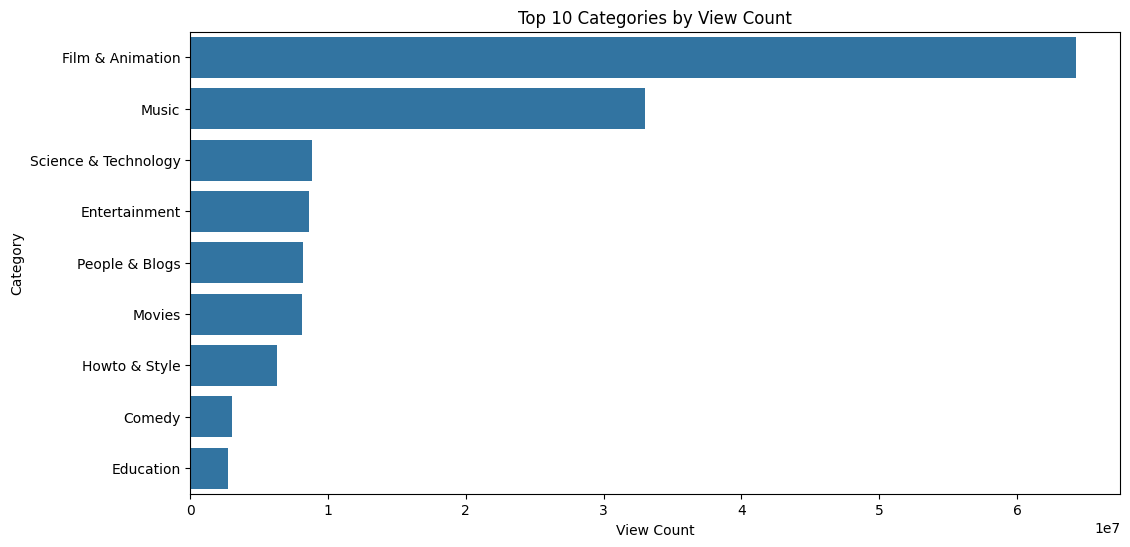

In [2]:
popular_categories = youtube_data.groupby('category_id').mean('view_count').reset_index()
popular_categories = popular_categories.merge(categories, on='category_id', how='left')
plt.figure(figsize=(12,6))
plt.title('Top 10 Categories by View Count')
sns.barplot(data=popular_categories.sort_values('view_count', ascending=False).head(10), x='view_count', y='title')
plt.xlabel('View Count')
plt.ylabel('Category')
plt.show()
plt.close()


As you can clearly see, the top categories are Film & Animation, Music and Science & Technology. We could then isolate videos in these categories and analyse other qualities such as average video duration or like_count vs view_count.

## Optimal Upload Day:

some days of the week are morelikely to get more views than others. Finding out the best days of the week to upload could be critical to gaining more views via organic growth when your YouTube following is small.

C:\Users\jackr\AppData\Local\Temp\ipykernel_46132\2988567641.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'published_day', y = 'view_count', data = youtube_data, palette='viridis')


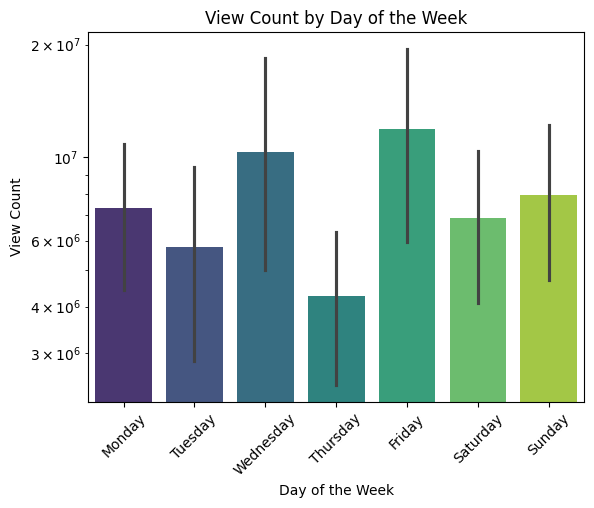

In [3]:
# Making days of the week cartegorical and ordered
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = pd.CategoricalDtype(categories=days_of_week, ordered=True)
youtube_data['published_day'] = youtube_data['published_day'].astype(cat_type)

# Plotting view count by day of the week
barplot = sns.barplot(x = 'published_day', y = 'view_count', data = youtube_data, palette='viridis')
plt.title('View Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('View Count')
barplot.set(yscale='log')
plt.xticks(rotation=45)
plt.show()
plt.close()


This barplot shows that Fridays and Wednesdays are the best days of the week for views. Now that we know this we could figure out the best time of day to upload the videos by mapping total view count over the published time.

C:\Users\jackr\AppData\Local\Temp\ipykernel_46132\2502283953.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Day of the Week')


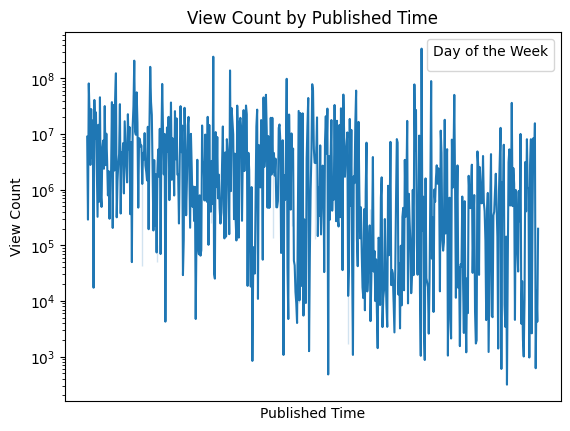

In [ ]:
lineplot = sns.lineplot(data=youtube_data, x='published_time', y='view_count', hue='published_day')
plt.title('View Count by Published Time and Day of the Week')
plt.xlabel('Published Time')
plt.ylabel('View Count')
lineplot.set_xticks([])
lineplot.set(yscale='log')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.show()
